<a href="https://colab.research.google.com/github/divsal009/div/blob/master/ANN_Classifn_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv')


In [5]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Data Manipulation**

In [6]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes.head(15)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
X = diabetes.drop(['Pregnancies', 'Outcome'], axis = 1)


In [11]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [13]:
# Replace 0 with Nan
X.replace(0, np.nan, inplace=True)

In [14]:
X.isnull().sum().sort_values()


DiabetesPedigreeFunction      0
Age                           0
Glucose                       5
BMI                          11
BloodPressure                35
SkinThickness               227
Insulin                     374
dtype: int64

In [15]:
X['Insulin'].unique()

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [16]:
X['Insulin'].mean()

155.5482233502538

In [18]:
X['Insulin'].median()

125.0

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
diabetes_array = imputer.fit_transform(X)

In [20]:
diabetes_array

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [19]:
diabetes_df = pd.DataFrame(diabetes_array, columns=X.columns)


In [21]:
diabetes_df.isnull().sum()


Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [22]:
diabetes_df['Pregnancies']= diabetes.Pregnancies

In [23]:
diabetes_df['Outcome'] = diabetes.Outcome

In [24]:
diabetes_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,6,1
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,1,0
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10,0
764,122.0,70.0,27.0,125.0,36.8,0.340,27.0,2,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5,0
766,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1,1


In [25]:
diabetes_df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Pregnancies                 0
Outcome                     0
dtype: int64

## **Correlation**

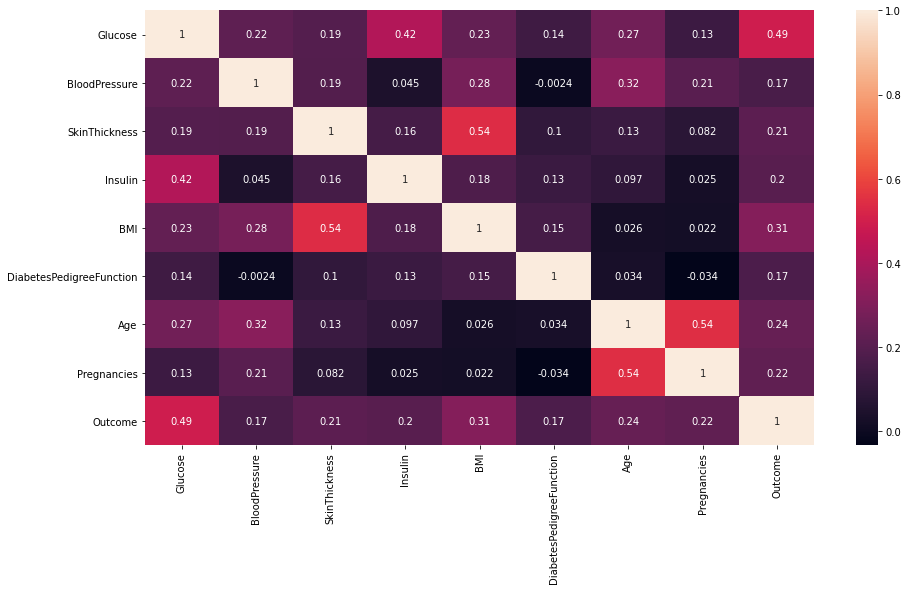

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(diabetes_df.corr(), annot = True)


In [26]:
diabetes_df.iloc[:,:-1]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,6
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,1
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0,8
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10
764,122.0,70.0,27.0,125.0,36.8,0.340,27.0,2
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5
766,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1


In [29]:
X = diabetes_df.iloc[:,:-1]


In [30]:
Y=diabetes_df['Outcome'] = diabetes.Outcome


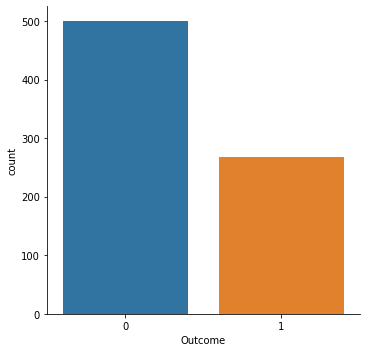

In [40]:
sns.catplot(x='Outcome', kind ='count', data = diabetes_df)

# **Splitting train and test**

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.15, random_state = 2)




# **ANN Clasification**

In [41]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf



Using TensorFlow backend.


In [69]:
def build_model():
  model = Sequential()
  model.add(Dense(units = 64, activation=tf.nn.relu, input_shape = [len(X.keys())]))
  # Hidden Layer - I 
  model.add(Dense(units = 64, activation=tf.nn.relu))
  # Hidden Layer - II
  model.add(Dense(units = 64, activation=tf.nn.relu))
  # Output Layer 
  model.add(Dense(units = 1 , activation='sigmoid'))

  optimizers = Adam(learning_rate=0.001)
  model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
  return model
  

In [70]:
model = build_model()


In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(X_train, Y_train, epochs = 400, batch_size=35, validation_split=0.2)


Train on 521 samples, validate on 131 samples
Epoch 1/400
521/521 [==============================] - 0s 311us/step - loss: 0.8952 - accuracy: 0.6142 - val_loss: 0.7792 - val_accuracy: 0.6870
Epoch 2/400
521/521 [==============================] - 0s 52us/step - loss: 0.7261 - accuracy: 0.6775 - val_loss: 0.6413 - val_accuracy: 0.7023
Epoch 3/400
521/521 [==============================] - 0s 54us/step - loss: 0.6229 - accuracy: 0.6910 - val_loss: 0.6360 - val_accuracy: 0.7557
Epoch 4/400
521/521 [==============================] - 0s 58us/step - loss: 0.7419 - accuracy: 0.6296 - val_loss: 0.7266 - val_accuracy: 0.6107
Epoch 5/400
521/521 [==============================] - 0s 58us/step - loss: 0.7376 - accuracy: 0.6852 - val_loss: 0.8442 - val_accuracy: 0.5802
Epoch 6/400
521/521 [==============================] - 0s 56us/step - loss: 0.6523 - accuracy: 0.7102 - val_loss: 0.6663 - val_accuracy: 0.7557
Epoch 7/400
521/521 [==============================] - 0s 57us/step - loss: 0.5921 - accu

In [72]:
predictions= model.predict(X_test)
predictions


array([[5.0622723e-10],
       [6.6972452e-01],
       [2.1435797e-02],
       [9.6892381e-01],
       [6.7038000e-02],
       [2.2353232e-03],
       [7.1305650e-10],
       [2.0858556e-02],
       [6.1298740e-01],
       [9.9947238e-01],
       [2.9981604e-07],
       [6.7357242e-01],
       [8.8585985e-01],
       [6.3994110e-02],
       [1.0644019e-02],
       [9.4684148e-01],
       [9.9995685e-01],
       [7.8946686e-01],
       [1.0909632e-01],
       [9.7809911e-01],
       [9.5519602e-01],
       [8.0930144e-01],
       [2.0084354e-01],
       [9.6876150e-01],
       [3.2065002e-06],
       [2.5108457e-04],
       [8.3465278e-02],
       [9.0975416e-01],
       [1.9550920e-03],
       [9.1335177e-04],
       [6.1721557e-01],
       [8.3533323e-01],
       [4.0379859e-06],
       [5.6489319e-02],
       [1.8961936e-08],
       [9.6966922e-01],
       [9.2252016e-01],
       [8.1034154e-01],
       [3.4729791e-01],
       [1.4816147e-01],
       [9.8119140e-01],
       [5.199327

In [74]:
yhat=np.round(predictions)

# **Confusion Matrix & Classification report**

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, yhat)


array([[51, 30],
       [13, 22]])

In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, yhat))


              precision    recall  f1-score   support

           0       0.80      0.63      0.70        81
           1       0.42      0.63      0.51        35

    accuracy                           0.63       116
   macro avg       0.61      0.63      0.60       116
weighted avg       0.68      0.63      0.64       116

